**NAME: HIMASISH GHOSAL** .
**ROLL NO-MA24M010**

---



In [103]:
# ALL REQUIRED LIBRARIES
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import integrate, cos, symbols, exp
from sympy.abc import t
from sympy.utilities.lambdify import lambdify

#1. Exact Analytical Solution of the system `y' = cos(t)-y`

---



In [104]:
# Define the symbolic variable s
s = symbols('s')

# Compute y(t) using the integral form of the solution
y_part1 = sp.exp(-t)
integrand = sp.exp(-(t - s))*cos(s)
y_exact = y_part1 + sp.integrate(integrand, (s, 0, t))
print("The Exact solution of the system is: ")
sp.pprint(y_exact.evalf())

The Exact solution of the system is: 
                               -t
0.5⋅sin(t) + 0.5⋅cos(t) + 0.5⋅ℯ  


#2.Euler method's Class defination `Eulersolver`

---



In [105]:
class EulerSolver:
    def __init__(self, f, a, b, y0, n):
        self.f = f
        self.a = a
        self.b = b
        self.y0 = y0
        self.n = n
        self.h = (b - a) / n
        self.t_vals = [a]
        self.y_vals = [y0]

    def solve(self):
        for i in range(self.n):
            t_i = self.t_vals[-1]
            y_i = self.y_vals[-1]
            t_next = t_i + self.h
            y_next = y_i + self.h * self.f(t_i, y_i)
            self.t_vals.append(t_next)
            self.y_vals.append(y_next)
        return self.t_vals, self.y_vals

    def plot(self, label='Euler Approximation'):
        plt.plot(self.t_vals, self.y_vals, label=label)
        plt.xlabel("t")
        plt.ylabel("y")
        plt.title("Euler Method Solution for n=20")
        plt.legend()
        plt.grid(True)


#3. Solution of the given IVP using the  Eulersolver with n=20

---



t_vals ,  y_vals :
0.00000, 1.00000
0.25000, 1.00000
0.50000, 0.99223
0.75000, 0.96357
1.00000, 0.90560
1.25000, 0.81427
1.50000, 0.68954
1.75000, 0.53484
2.00000, 0.35657
2.25000, 0.16339
2.50000, -0.03450
2.75000, -0.22616
3.00000, -0.40070
3.25000, -0.54802
3.50000, -0.65955
3.75000, -0.72878
4.00000, -0.75172
4.25000, -0.72720
4.50000, -0.65692
4.75000, -0.54539
5.00000, -0.39964


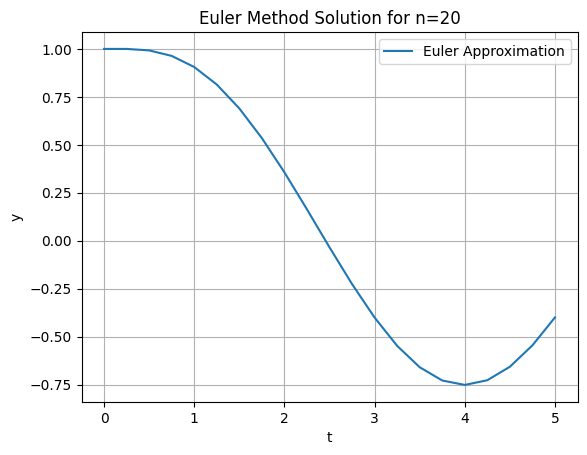

In [106]:
 # Define the differential equation
def f(t, y):
    return np.cos(t) - y
# Instantiate and use the solver
solver = EulerSolver(f, a=0, b=5, y0=1, n=20)
t_vals, y_vals = solver.solve()

print("t_vals ,  y_vals :")
for t_val, y_val in zip(t_vals, y_vals):
    print(f"{t_val:.5f}, {y_val:.5f}")

solver.plot()

plt.show()

# 4. Comparison plot with the exact solution and Eulersolver solution with n=20

---



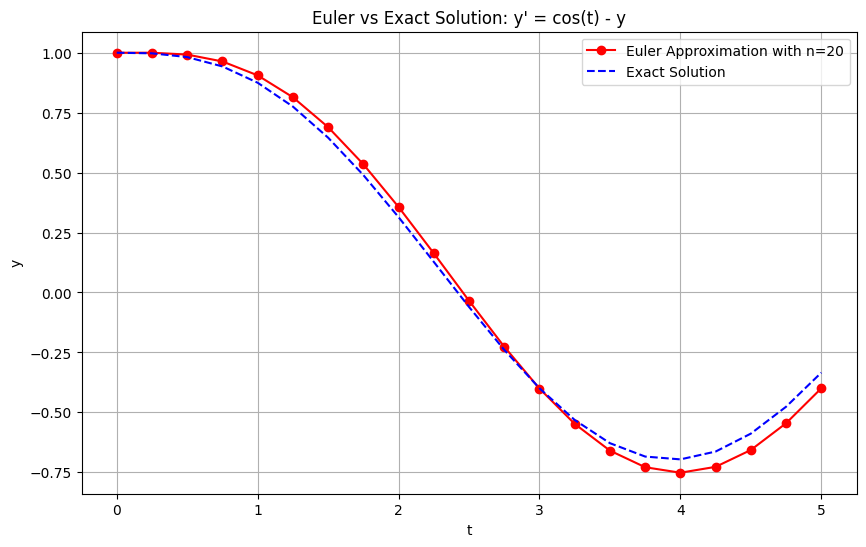

In [107]:
#NumPy-compatible function from the symbolic expression y_exact
exact_func = lambdify(t, y_exact, 'numpy')
t_array = np.array(t_vals)
y_exact_vals = exact_func(t_array)

plt.figure(figsize=(10, 6))
plt.plot(t_vals, y_vals, 'ro-', label='Euler Approximation with n=20')
plt.plot(t_array, y_exact_vals, 'b--', label='Exact Solution ')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Euler vs Exact Solution: y' = cos(t) - y")
plt.legend()
plt.grid(True)
plt.show()

#5. Solution of the given IVP using the  Eulersolver with n=100 and comparison plot with the exact solution.


---



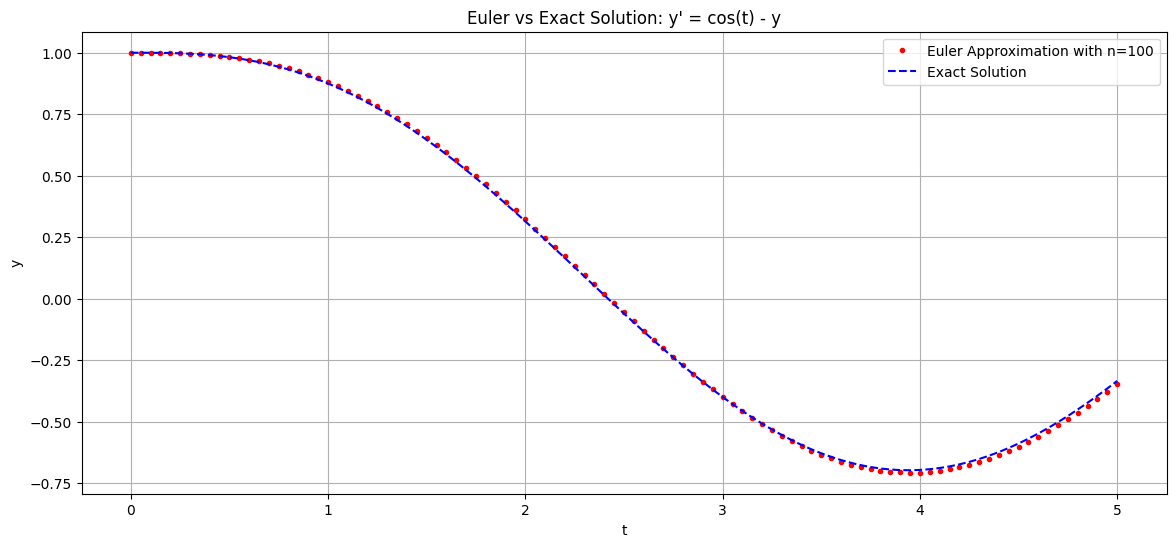

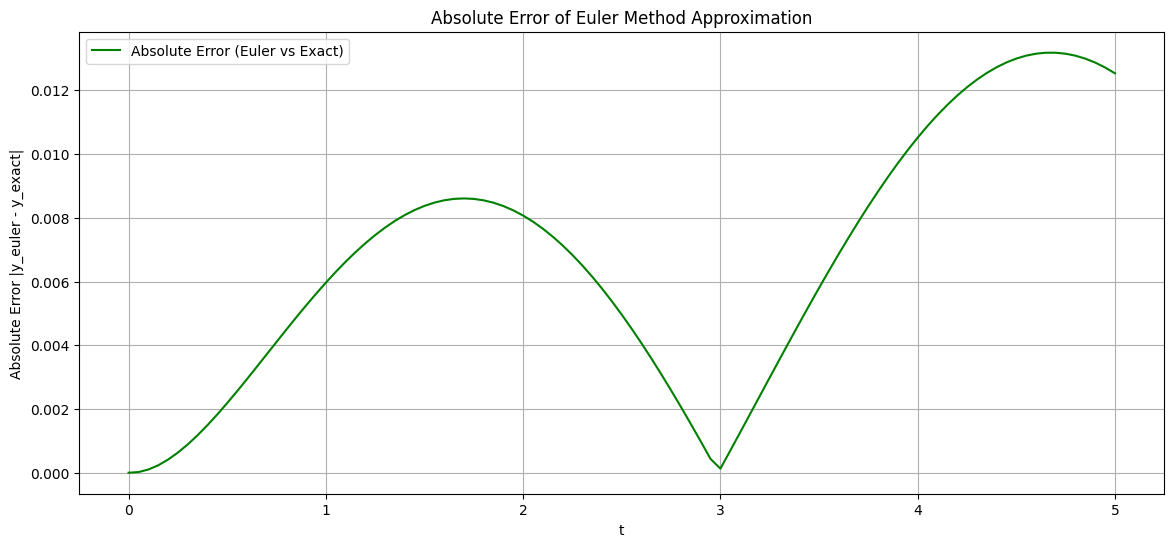

In [108]:
 # Define the differential equation
def f(t, y):
    return np.cos(t) - y

# Instantiate and use the solver
solver = EulerSolver(f, a=0, b=5, y0=1, n=100)
t_vals, y_vals = solver.solve()

# NumPy-compatible function from the symbolic expression y_exact
exact_func = lambdify(t, y_exact, 'numpy')
t_array = np.array(t_vals)
y_exact_vals = exact_func(t_array)

plt.figure(figsize=(14, 6))
plt.plot(t_vals, y_vals, 'r.', label='Euler Approximation with n=100')
plt.plot(t_array, y_exact_vals, 'b--', label='Exact Solution ')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Euler vs Exact Solution: y' = cos(t) - y")
plt.legend()
plt.grid(True)
plt.show()

# Calculate the absolute difference between the Euler approximation and the exact solution
error_vals = np.abs(np.array(y_vals) - np.array(y_exact_vals))

# Plot the error
plt.figure(figsize=(14, 6))
plt.plot(t_vals, error_vals, 'g-', label='Absolute Error (Euler vs Exact)')
plt.xlabel('t')
plt.ylabel('Absolute Error |y_euler - y_exact|')
plt.title("Absolute Error of Euler Method Approximation")
plt.legend()
plt.grid(True)
plt.show()

#6. Solution of the given IVP using the  Eulersolver with n=1000 and comparison plot with the exact solution.


---



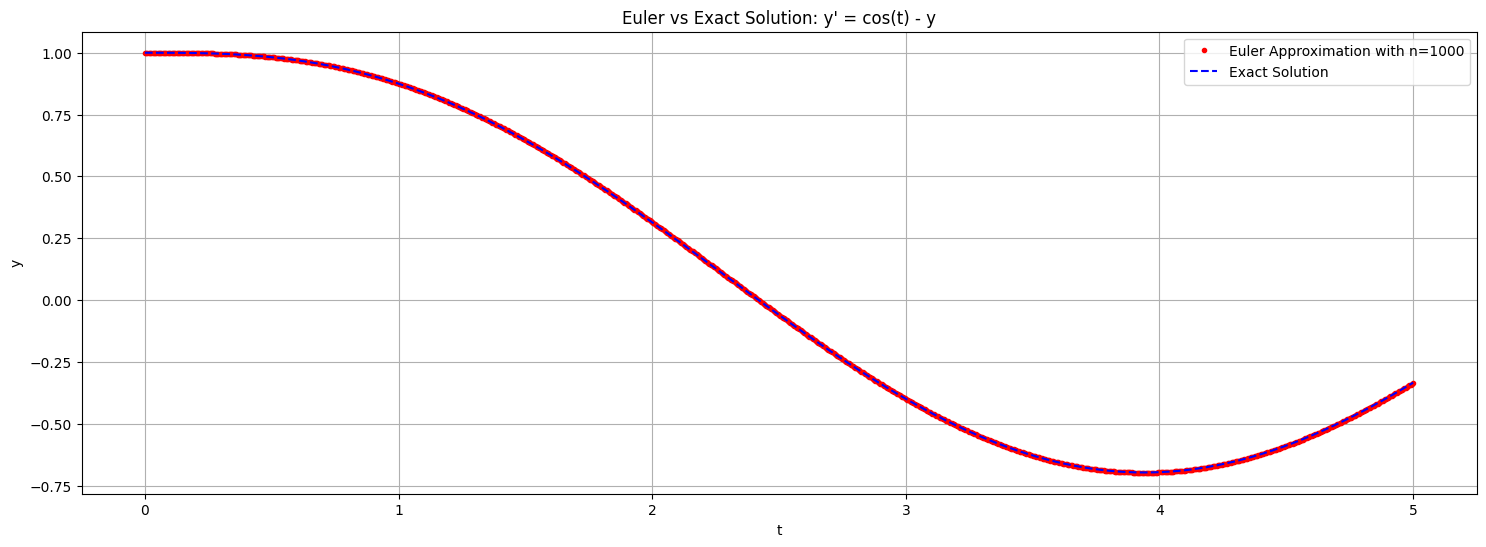

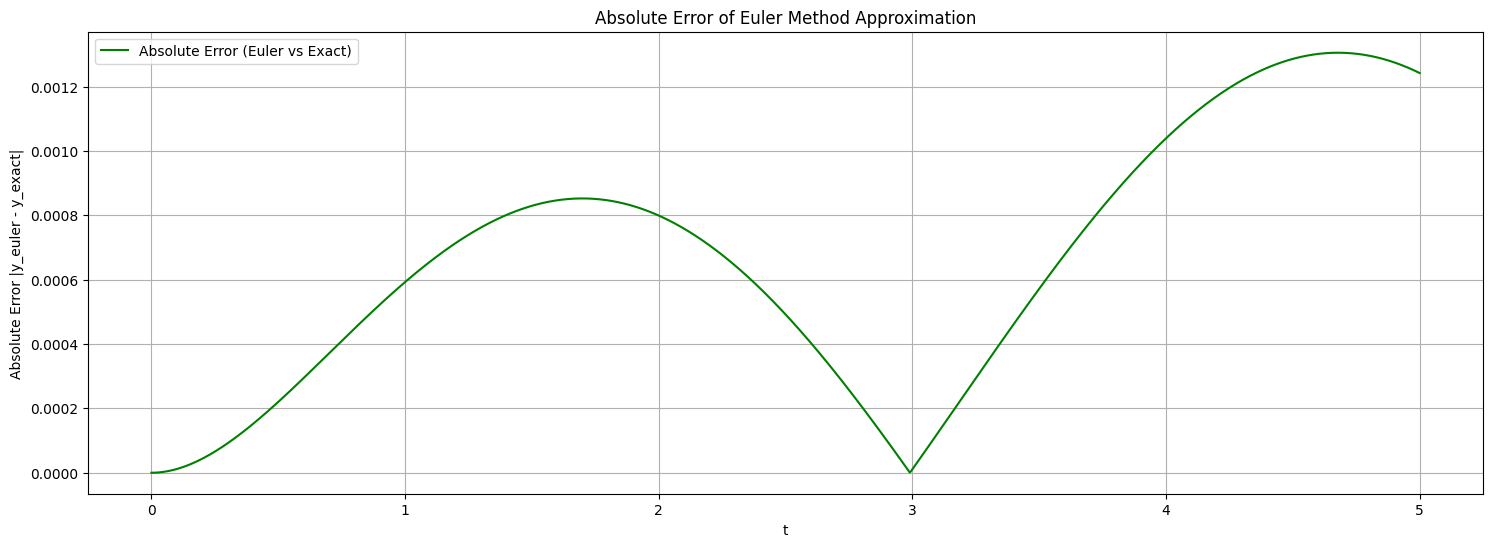

In [109]:
# Define the differential equation
def f(t, y):
    return np.cos(t) - y
# Instantiate and use the solver
solver = EulerSolver(f, a=0, b=5, y0=1, n=1000)
t_vals, y_vals = solver.solve()

exact_func = lambdify(t, y_exact, 'numpy')
t_array = np.array(t_vals)
y_exact_vals = exact_func(t_array)

plt.figure(figsize=(18, 6))
plt.plot(t_vals, y_vals, 'r.', label='Euler Approximation with n=1000')
plt.plot(t_array, y_exact_vals, 'b--', label='Exact Solution ')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Euler vs Exact Solution: y' = cos(t) - y")
plt.legend()
plt.grid(True)
plt.show()

# Calculate the absolute difference between the Euler approximation and the exact solution
error_vals = np.abs(np.array(y_vals) - np.array(y_exact_vals))

# Plot the error
plt.figure(figsize=(18, 6))
plt.plot(t_vals, error_vals, 'g-', label='Absolute Error (Euler vs Exact)')
plt.xlabel('t')
plt.ylabel('Absolute Error |y_euler - y_exact|')
plt.title("Absolute Error of Euler Method Approximation")
plt.legend()
plt.grid(True)
plt.show()

#7.Conclusion:



---
Based on the results obtained by applying the Euler method with different values of n (specifically n=20, n=100, and n=1000), we can draw the following conclusion:

As the number of steps `n` increases, the approximation of the solution obtained by the Euler method becomes more accurate. This is because the step size `h = (b - a) / n` decreases as `n` increases. A smaller step size means that the Euler method is taking smaller linear steps to approximate the curve of the actual solution, resulting in less error accumulation over the interval.So giving us a result that Euler method is best suited if the solution is linear.

We can visually see this in the generated plots:

(i) The plot for n=20 shows a noticeable difference between the Euler approximation and the exact solution.

(ii) The plot for n=100 shows the Euler approximation following the exact solution much more closely, and the error plot shows a smaller magnitude of error compared to n=20.

(iii) The plot for n=1000 shows the Euler approximation very closely matching the exact solution, with the error plot showing the smallest magnitude of error among the three cases.
Therefore, increasing the number of steps `n` improves the accuracy of the Euler method approximation for this differential equation.





